In [ ]:
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as pyplot
import numpy as np
from keras.datasets import mnist
from sklearn.linear_model import LinearRegression

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
class MLP(nn.Module):
  def __init__(self, input_size, output_size):
    super(MLP, self).__init__()

    self.input_size = input_size
    self.output_size = output_size

    self.linear = nn.Linear(self.input_size, 20)
    self.sigmoid = nn.Sigmoid()
    self.linear2 = nn.Linear(20, 20)
    self.sigmoid2 = nn.Sigmoid()
    self.linear3 = nn.Linear(20, 20)
    self.sigmoid3 = nn.Sigmoid()
    self.linear4 = nn.Linear(20,output_size)

  def forward(self, x):
    linear = self.linear(x)
    sigmoid1 = self.sigmoid(linear)
    linear2 = self.linear2(sigmoid1)
    sigmoid2 = self.sigmoid2(linear2)
    linear3 = self.linear3(sigmoid2)
    sigmoid3 = self.sigmoid3(linear3)
    final = self.linear4(sigmoid3)
    return final

In [ ]:
input = torch.randn(2,5)
mlp_trial = MLP(5, 3)
mlp_trial(input)

tensor([[0.2263, 0.0307, 0.2982],
        [0.2249, 0.0270, 0.2972]], grad_fn=<AddmmBackward0>)

In [ ]:
mlp_trial

MLP(
  (linear): Linear(in_features=5, out_features=20, bias=True)
  (sigmoid): Sigmoid()
  (linear2): Linear(in_features=20, out_features=20, bias=True)
  (sigmoid2): Sigmoid()
  (linear3): Linear(in_features=20, out_features=3, bias=True)
)

In [ ]:
X = torch.from_numpy(train_X.astype(np.float32))
X = X.reshape(60000, 28*28)

In [ ]:
mlp = MLP(28*28, 1)
adam = optim.SGD(mlp.parameters(), lr = 1)
loss = nn.L1Loss()

In [ ]:
Y = torch.from_numpy(train_y.astype(np.float32))

In [ ]:
y_pred = mlp(X)
# yres = torch.argmax(y_pred)
# y_pred = y_pred.to(torch.long)
Y = Y.to(torch.float)
# yres.requires_grad = True
# loss(y_pred, Y)
y_pred = y_pred.reshape(60000)
loss(y_pred, Y)

tensor(4.0491, grad_fn=<L1LossBackward0>)

In [ ]:
n_epoch =1000
for epoch in range(n_epoch):
  adam.zero_grad()
  y_pred = mlp(X)
  y_pred = y_pred.reshape(60000)
  lossVal = loss(y_pred, Y)
  # print(y_pred)
  print(f"epoch: {epoch}, loss value = {lossVal}")
  lossVal.backward()
  if(lossVal.item()<0.5):
    break
  adam.step()

epoch: 0, loss value = 0.7480524182319641
epoch: 1, loss value = 0.8443462252616882
epoch: 2, loss value = 0.8737793564796448
epoch: 3, loss value = 0.8066704273223877
epoch: 4, loss value = 0.8934581279754639
epoch: 5, loss value = 0.7665296792984009
epoch: 6, loss value = 0.9251075983047485
epoch: 7, loss value = 0.7732699513435364
epoch: 8, loss value = 0.9122816920280457
epoch: 9, loss value = 0.7402741312980652
epoch: 10, loss value = 0.7292045950889587
epoch: 11, loss value = 0.716707170009613
epoch: 12, loss value = 0.9161319136619568
epoch: 13, loss value = 0.7537885308265686
epoch: 14, loss value = 0.8931015729904175
epoch: 15, loss value = 0.7396190166473389
epoch: 16, loss value = 0.7507293224334717
epoch: 17, loss value = 0.7101528644561768
epoch: 18, loss value = 0.8961259126663208
epoch: 19, loss value = 0.7449816465377808
epoch: 20, loss value = 0.8810667991638184
epoch: 21, loss value = 0.7502144575119019
epoch: 22, loss value = 0.8739527463912964
epoch: 23, loss value 

In [ ]:
Xtest = torch.from_numpy(test_X.astype(np.float32))
Xtest = Xtest.reshape(10000, 28*28)
Ytest = torch.from_numpy(test_y.astype(np.float32))

In [ ]:
Yres = mlp(X)
Yres = Yres.detach().numpy()

In [ ]:
Yres = Yres.reshape(60000)

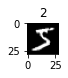

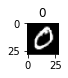

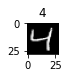

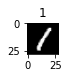

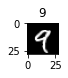

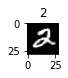

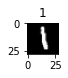

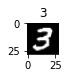

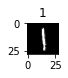

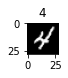

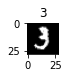

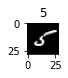

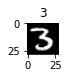

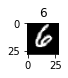

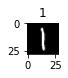

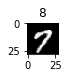

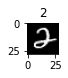

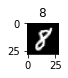

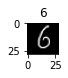

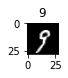

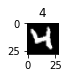

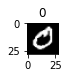

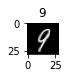

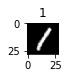

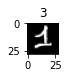

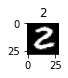

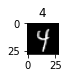

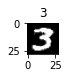

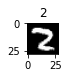

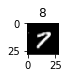

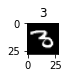

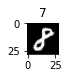

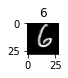

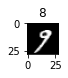

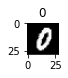

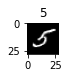

In [ ]:
for i in range(36):
  pyplot.subplot(6,6,i+1)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.title(round(Yres[i]))
  pyplot.show()

In [ ]:
y_pred = y_pred - torch.ones_like(y_pred)

In [ ]:
linear = LinearRegression()
linear.fit(X, Y)

LinearRegression()

In [ ]:
linear.score(Xtest, Ytest)

0.6241945821529145